# 2. 線形代数

### 主成分分析の実装

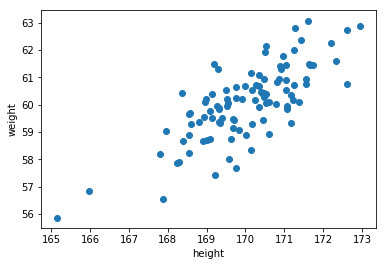

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)
X = np.random.multivariate_normal([170,60],[[1.4,1],[1,1.4]], 100)
plt.xlabel("height")
plt.ylabel("weight")
plt.scatter(X.T[0], X.T[1])
plt.show()

In [2]:
# 重心を引く
# [x - x.mean, y - y.mean]
Z = np.array([row - np.mean(row) for row in X.T]).T
print(Z[:5])

[[ 0.46956247  0.36545891]
 [ 1.59439801  3.00772384]
 [ 2.32891495  1.52225624]
 [-0.0061054  -1.1737019 ]
 [ 1.55331299  0.68649488]]


In [3]:
# 分散共分散行列
# [[(x - x.mean)(x - x.mean), (x - x.mean)(y - y.mean)], [(y - y.mean)(x - x.mean), (y - y.mean)(y - y.mean)]]
m = np.dot(Z.T, Z) / Z.shape[0]
print(m)

[[1.67000169 1.32814391]
 [1.32814391 1.82396248]]


In [4]:
# 固有値・固有ベクトル
w, v = np.linalg.eig(m)
print(w)
print(v.T)

[0.41660912 3.07735505]
[[-0.72727703  0.68634402]
 [-0.68634402 -0.72727703]]


In [5]:
# Zと固有ベクトルの内積
X_pca = np.dot(Z, v.T)
print(X_pca[:5])

[[-0.59233254  0.05649152]
 [-3.22390233 -1.09314293]
 [-2.73855783  0.49133485]
 [ 0.8100036   0.84941604]
 [-1.60086052  0.56683512]]


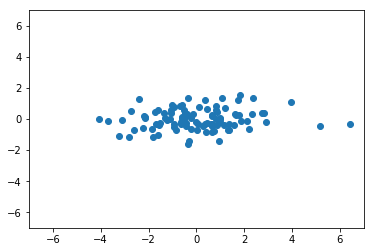

In [6]:
plt.scatter(X_pca.T[0], X_pca.T[1])
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()

In [7]:
# 次元削減（2 -> 1）
# 固有値が大きい方のインデックス
idx = np.argmax(w)
print(idx)

1


In [8]:
# 大きい方の固有ベクトル
v_max = v.T[idx]
print(v_max)

[-0.68634402 -0.72727703]


In [9]:
X_pca_1 = np.dot(Z, v_max.T)
print(X_pca_1[:5])

[-0.58807127 -3.28175401 -2.70553885  0.85779684 -1.56537904]


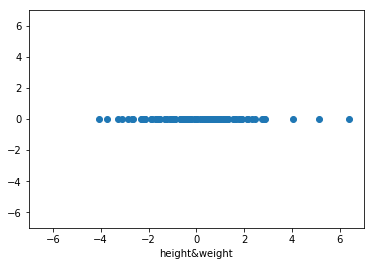

In [10]:
plt.xlabel("height&weight")
plt.scatter(X_pca_1.T, [0]*100)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()